# Petrol Prices Worldwide Analysis
Dillon Constantine - dillon.l.constantine@aib.ie

This piece of code is part of an Exploritory analysis into the Petrol Prices from June 2022. The Author of the dataset is Zeeshan Usmani. The Data was collected from google sources such as the sites - IMF, World Bank and United Nations.

The Dataset is an available from Kaggle (https://www.kaggle.com/) and is open source.


### Import the Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing plotly as a interactive visualisation tool
import plotly.express as px
import plotly.graph_objects as go

### Importing the Dataset

In [2]:
#Importing the DataSet

df_ppww = pd.read_csv("Petrol Dataset June 23 2022 -- Version 2.csv", index_col = 'S#', encoding='latin-1') 
df_ppww.head()

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
S#,,,,,,,,,,
1,United States,"19,687,287",20%,934.3,5.19,1.37,289.97,"63,414","12,218",13
2,China,"12,791,553",13%,138.7,5.42,1.43,302.87,"10,435","1,925",14
3,India,"4,443,000",5%,51.4,5.05,1.33,281.93,"1,901",376,7
4,Japan,"4,012,877",4%,481.5,4.69,1.24,262.05,"40,193","8,570",18
5,Russia,"3,631,287",4%,383.2,3.41,0.90,190.56,"10,127","2,970",8


### First Look and Data Cleaning
This is where the data is first explored and any inconsitencies with the structure of the data, data types and null values are found and cleaned up.

In [3]:
# Used to get the data structures and types
df_ppww.shape
df_ppww.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 181
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               181 non-null    object 
 1   Daily Oil Consumption (Barrels)       181 non-null    object 
 2   World Share                           181 non-null    object 
 3   Yearly Gallons Per Capita             181 non-null    float64
 4   Price Per Gallon (USD)                181 non-null    float64
 5   Price Per Liter (USD)                 181 non-null    float64
 6   Price Per Liter (PKR)                 181 non-null    float64
 7   GDP Per Capita ( USD )                181 non-null    object 
 8   Gallons GDP Per Capita Can Buy        181 non-null    object 
 9   xTimes Yearly Gallons Per Capita Buy  181 non-null    int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 15.6+ KB


In [4]:
# Need to change objects to floats (GDP Per Capita (USD) & Gallons GDP Per Capita Can Buy)
for i in [1,7,8]:
    df_ppww.iloc[:,i] = pd.to_numeric(df_ppww.iloc[:,i].str.replace(',', ''))
    

df_ppww['World Share'] = df_ppww['World Share'].apply(lambda x:x.replace('%', '')).astype(float)

# Drop price in PKR as no use for the column and tidy up data.
df_ppww.drop('Price Per Liter (PKR)', axis = 1, inplace = True)

df_ppww.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 181
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               181 non-null    object 
 1   Daily Oil Consumption (Barrels)       181 non-null    int64  
 2   World Share                           181 non-null    float64
 3   Yearly Gallons Per Capita             181 non-null    float64
 4   Price Per Gallon (USD)                181 non-null    float64
 5   Price Per Liter (USD)                 181 non-null    float64
 6   GDP Per Capita ( USD )                181 non-null    int64  
 7   Gallons GDP Per Capita Can Buy        181 non-null    int64  
 8   xTimes Yearly Gallons Per Capita Buy  181 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 14.1+ KB


In [37]:
# Create new Columns total cost column per day in each country. 
#(Need to find the quantity in liters of a Oil Barrel Book Reference - 159L or 42 Gallons)

# Create a Gallon Cost per Day in each Country.
daily_gallons_cost = (df_ppww['Daily Oil Consumption (Barrels)']*42) * df_ppww['Price Per Gallon (USD)']
df_ppww['Daily Gallon Cost'] = round(daily_gallons_cost,2)


# Create a Liter Cost per Day in each country .
daily_liters_cost = (df_ppww['Daily Oil Consumption (Barrels)']*159) * df_ppww['Price Per Liter (USD)']
df_ppww['Daily Liter Cost'] = round(daily_liters_cost, 2)


df_ppww.head()

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy,Daily Gallon Cost,Daily Liter Cost
S#,,,,,,,,,,,
1,United States,19687287,20.0,934.3,5.19,1.37,63414,12218,13,4.291435e+09,4.288482e+09
2,China,12791553,13.0,138.7,5.42,1.43,10435,1925,14,2.911869e+09,2.908415e+09
3,India,4443000,5.0,51.4,5.05,1.33,1901,376,7,9.423603e+08,9.395612e+08
4,Japan,4012877,4.0,481.5,4.69,1.24,40193,8570,18,7.904565e+08,7.911788e+08
5,Russia,3631287,4.0,383.2,3.41,0.90,10127,2970,8,5.200729e+08,5.196372e+08


In [40]:
# Check for null values in each field.
df_ppww.isnull().sum()

# As there is no missing values in the dataset no need to drop missing values.

Country                                 0
Daily Oil Consumption (Barrels)         0
World Share                             0
Yearly Gallons Per Capita               0
Price Per Gallon (USD)                  0
Price Per Liter (USD)                   0
GDP Per Capita ( USD )                  0
Gallons GDP Per Capita Can Buy          0
xTimes Yearly Gallons Per Capita Buy    0
Daily Gallon Cost                       0
Daily Liter Cost                        0
dtype: int64

In [41]:
# Check to make sure there is 181 unique countries and no duplicate enteries.
df_ppww.nunique()

Country                                 181
Daily Oil Consumption (Barrels)         156
World Share                               8
Yearly Gallons Per Capita               180
Price Per Gallon (USD)                  156
Price Per Liter (USD)                   118
GDP Per Capita ( USD )                  178
Gallons GDP Per Capita Can Buy          178
xTimes Yearly Gallons Per Capita Buy     34
Daily Gallon Cost                       181
Daily Liter Cost                        181
dtype: int64

In [42]:
# Stats Summary - Can see the basic stats of all the columns.
round(df_ppww.describe(), 2)

,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy,Daily Gallon Cost,Daily Liter Cost
count,181.00,181.00,181.00,181.00,181.00,181.00,181.00,181.00,1.810000e+02,1.810000e+02
mean,533573.05,0.50,332.01,5.70,1.51,15259.79,4179.34,14.20,1.174772e+08,1.174807e+08
std,1858067.10,1.92,436.56,4.37,1.15,20542.23,15436.36,48.61,4.117590e+08,4.114928e+08
min,51.00,0.00,2.20,0.08,0.02,274.00,24.00,1.00,1.625820e+04,1.624980e+04
25%,20036.00,0.00,53.90,4.15,1.10,2033.00,473.00,6.00,4.093955e+06,4.106970e+06
50%,61612.00,0.00,180.20,5.28,1.40,6127.00,1410.00,9.00,1.165248e+07,1.172148e+07
75%,262352.00,0.00,424.60,6.76,1.79,20234.00,4103.00,12.00,6.467832e+07,6.453810e+07
max,19687287.00,20.00,3679.50,54.89,14.50,115874.00,200700.00,654.00,4.291435e+09,4.288482e+09


### Using Seaborn & MathPlot lib packages.

<AxesSubplot:xlabel='Price Per Liter (USD)', ylabel='Count'>

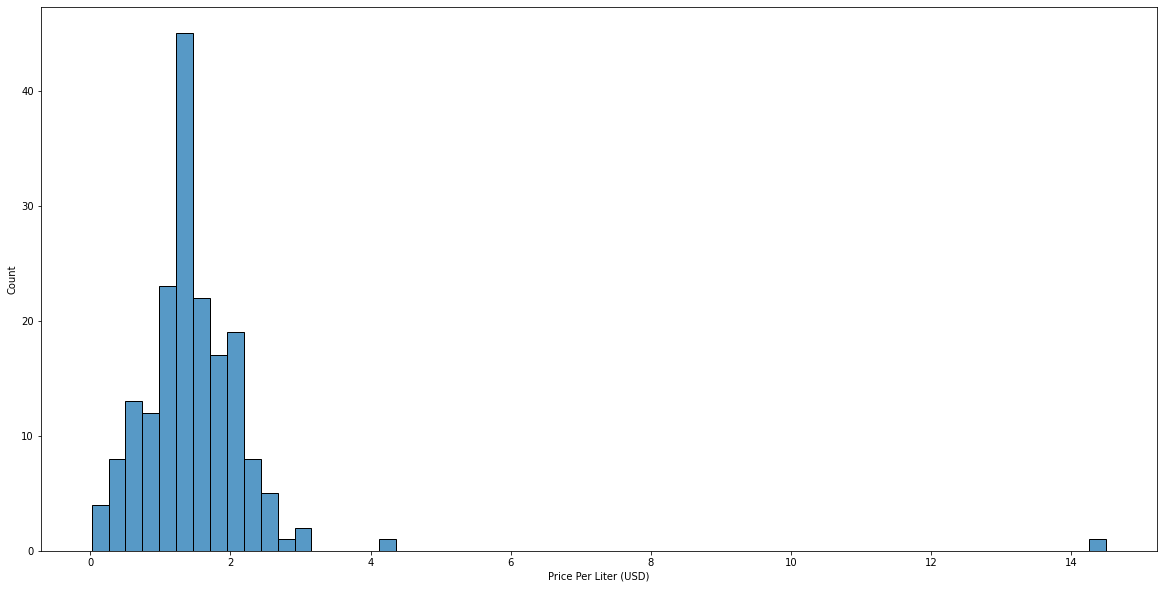

In [43]:
# Histogram
# Count of times of each Price Per Liter - Shows the majority of countries the price of 1L is less then $3

plt.figure(figsize = (20,10))
sns.histplot(data = df_ppww, x = 'Price Per Liter (USD)')

<AxesSubplot:>

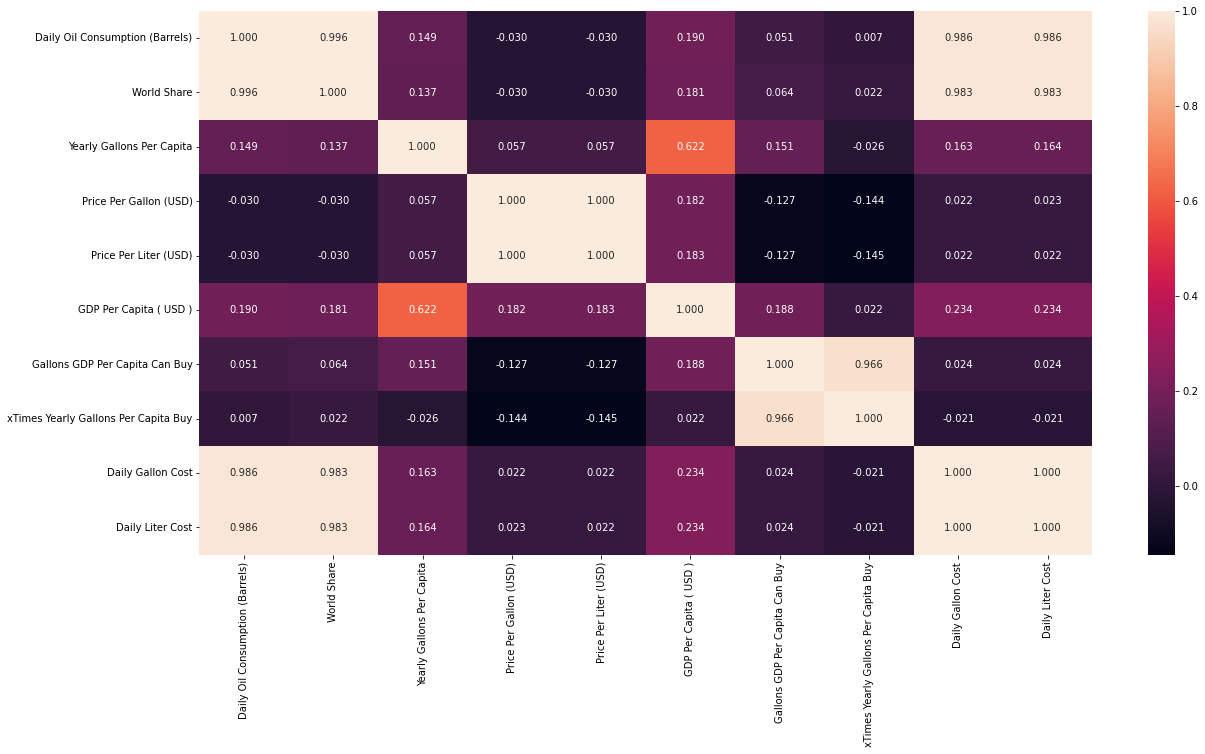

In [44]:
# Heatmap to show the correlation between all the Fields in this dataset.

plt.figure(figsize= (20,10))
sns.heatmap(df_ppww.corr(),annot = True, fmt = '.3f')

<AxesSubplot:xlabel='Yearly Gallons Per Capita', ylabel='Daily Oil Consumption (Barrels)'>

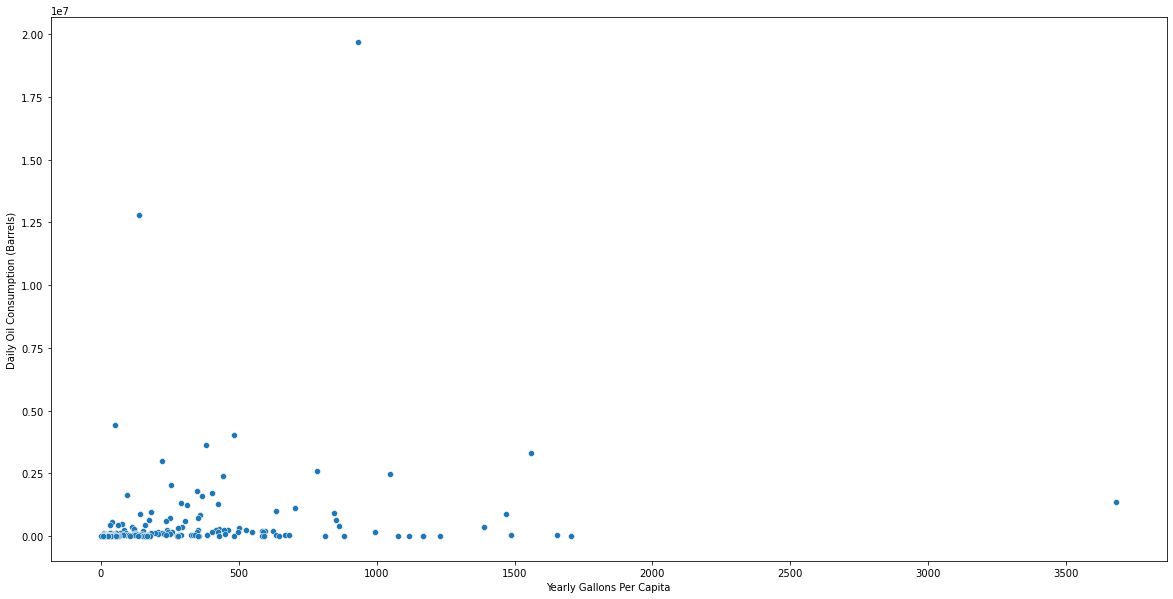

In [45]:
# Scatter Plot - Shows there is little corlation between the consumption of Oil and Yealy gallons per capita. (Proof Above on heat map)


plt.figure(figsize=(20,10))
sns.scatterplot(data = df_ppww, y = 'Daily Oil Consumption (Barrels)', x = 'Yearly Gallons Per Capita')

<AxesSubplot:xlabel='Yearly Gallons Per Capita', ylabel='GDP Per Capita ( USD )'>

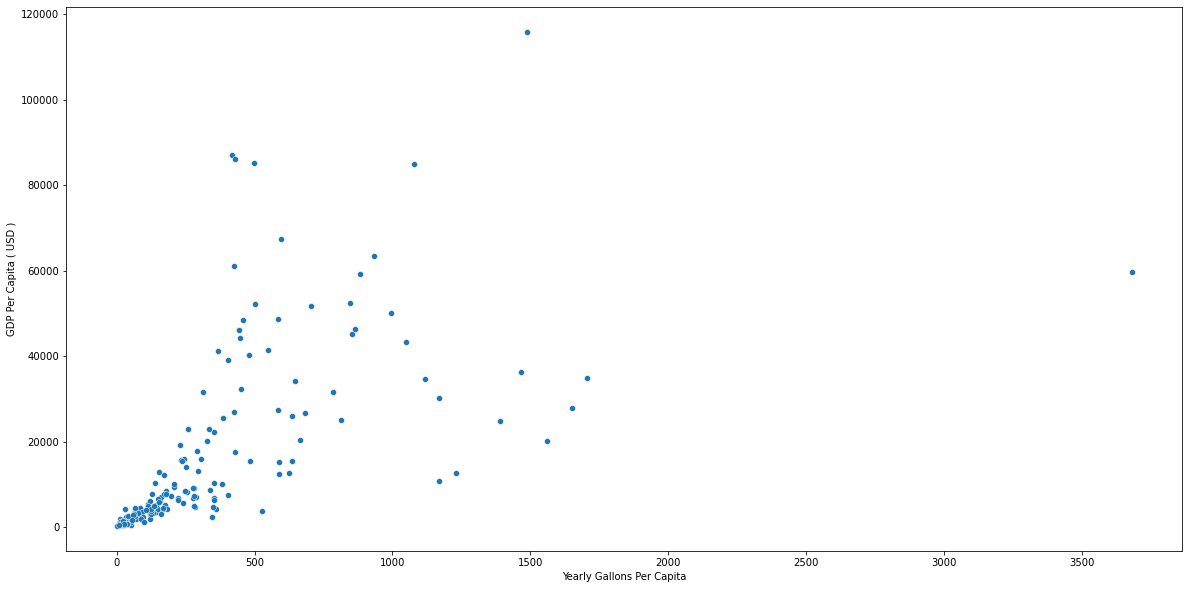

In [46]:
# Scatter Plot - Shows there is a strong corlation between the Yearly Gallons per capita and GDP Per Capita. (Proof in heatmap above)
plt.figure(figsize=(20,10))
sns.scatterplot(data = df_ppww, x = 'Yearly Gallons Per Capita', y = 'GDP Per Capita ( USD )')

# Top / Bottom Visualisations
This section of the code dipicts the top 10 values based on specified fields.

#### Price Analysis
This Section looks at the variations in the prices of petrol.

In [67]:
# Looking at the top 10 countries by the price per gallon (USD)
price_per_liter_top_10 = df_ppww.sort_values('Price Per Liter (USD)', ascending = False)[0:10]
#price_per_liter_top_10


In [70]:
# Bar Plot - Most Expensive countries to buy Liters of Oil.

fig_price = px.bar(price_per_liter_top_10, x = 'Country',  y = 'Price Per Liter (USD)', title = 'Most Expensive Liter Petrol Prices', color = 'Country')
fig_price.update_layout(font_size = 12, title_x = 0.45)

fig_price.show()

In [75]:
cheapest_petrol = df_ppww.sort_values('Price Per Liter (USD)', ascending = True)[0:10]

In [78]:
fig_cheapest_petrol = px.bar(cheapest_petrol, x = 'Country',  y = 'Price Per Liter (USD)', title = 'Lowest Liter of Petrol Prices', color = 'Country')
fig_cheapest_petrol.update_layout(font_size = 12, title_x = 0.45)

fig_cheapest_petrol.show()

#### Oil Consumption
This section looks at the countries that are the highest and lowest consumers of oil world wide.

In [49]:
top_oil_consumption = df_ppww.sort_values('Daily Oil Consumption (Barrels)', ascending = False)[0:15]
#top_oil_consumption

In [74]:
fig_high_oil = px.bar(top_oil_consumption, x = 'Country',  y = 'Daily Oil Consumption (Barrels)', title = 'Top 15 Daily Oil Consumers (Barrels)', color = 'Country')
fig_high_oil.update_layout(font_size = 12, title_x = 0.45)

fig_high_oil.show()

In [52]:
low_oil_consumption = df_ppww.sort_values('Daily Oil Consumption (Barrels)', ascending = True)[0:10]
#low_oil_consumption

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy,Daily Gallon Cost,Daily Liter Cost
S#,,,,,,,,,,,
178,Niue,51,0.0,484.4,11.43,3.02,15586,1364,3,24483.06,24489.18
171,Saint Helena,70,0.0,180.2,5.53,1.46,7800,1410,8,16258.20,16249.80
180,Montserrat,400,0.0,1231.1,4.57,1.21,12589,2755,2,76776.00,76956.00
172,Kiribati,400,0.0,54.5,4.09,1.08,1671,409,7,68712.00,68688.00
179,Saint Pierre & Miquelon,660,0.0,1705.1,8.27,2.19,34900,4220,2,229244.40,229818.60
181,Tonga,899,0.0,136.3,16.20,4.28,4903,303,2,611679.60,611787.48
170,Vanuatu,1100,0.0,60.6,4.92,1.30,2783,566,9,227304.00,227370.00
166,British Virgin Islands,1240,0.0,647.6,3.60,0.95,34246,9513,15,187488.00,187302.00
169,Comoros,1300,0.0,25.0,5.15,1.36,1403,272,11,281190.00,281112.00


In [72]:
fig_low_oil = px.bar(low_oil_consumption, x = 'Country',  y = 'Daily Oil Consumption (Barrels)', title = 'Lowest Daily Oil Consumers (Barrels)', color = 'Country')
fig_low_oil.update_layout(font_size = 12, title_x = 0.45)

fig_low_oil.show()

#### Costs
This section looks at the Daily Cost margins if the country is puying by the Liter Compared to the Gallon.

In [89]:
costs_margin_df = df_ppww.iloc[:, [0,1,5,6,9,10]].copy()  

costs_margin_df['Cost Margin'] = round(costs_margin_df['Daily Gallon Cost'] - costs_margin_df['Daily Liter Cost'],2)


costs_margin_df.head()

,Country,Daily Oil Consumption (Barrels),Price Per Liter (USD),GDP Per Capita ( USD ),Daily Gallon Cost,Daily Liter Cost,Cost Margin
S#,,,,,,,
1,United States,19687287,1.37,63414,4.291435e+09,4.288482e+09,2953093.05
2,China,12791553,1.43,10435,2.911869e+09,2.908415e+09,3453719.31
3,India,4443000,1.33,1901,9.423603e+08,9.395612e+08,2799090.00
4,Japan,4012877,1.24,40193,7.904565e+08,7.911788e+08,-722317.86
5,Russia,3631287,0.90,10127,5.200729e+08,5.196372e+08,435754.44


#### GDP Per Capita